# Preparacion de los datos

In [377]:
# Bibliotecas para Manipulación de Datos y Análisis
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Operaciones del sistema operativo
import os

# traduccion de texto
from googletrans import Translator

# Preprocesamiento y Escalado
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer

In [378]:
# Configuro los parámetros iniciales de matplotlib para estandarizar los gráficos
params = {
    'figure.figsize': (16, 10),  # Establezco el tamaño de cada gráfico
    'figure.dpi': 80,  # Configuro la resolución por pulgada
    'figure.facecolor': 'white',  # Defino el color de fondo
    'figure.edgecolor': 'white',  # Defino el color del borde
    'figure.frameon': True,  # Mantengo el borde del gráfico activado
    'figure.constrained_layout.use': False,  # Desactivo el diseño restringido para las figuras
    'figure.constrained_layout.h_pad': 0.04167,  # Espaciado horizontal en el diseño restringido
    'figure.constrained_layout.w_pad': 0.04167,  # Espaciado vertical en el diseño restringido
    'axes.labelsize': 12,  # Establezco el tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,  # Establezco el tamaño del título
    'axes.labelweight': 'normal',  # Configuro el grosor de la fuente de las etiquetas
    'xtick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje y
    'xtick.color': 'black',  # Configuro el color de las etiquetas del eje x
    'ytick.color': 'black',  # Configuro el color de las etiquetas del eje y
    'axes.spines.top': True,  # Mantengo visible el borde superior del gráfico
    'axes.spines.right': True,  # Mantengo visible el borde derecho del gráfico
    'legend.frameon': True,  # Mantengo visible el marco de la leyenda
    'grid.linestyle': '-',  # Defino el estilo de las líneas de la cuadrícula
    'grid.linewidth': 0.8,  # Configuro el grosor de las líneas de la cuadrícula
    'grid.color': 'gray',  # Establezco el color de las líneas de la cuadrícula
    'legend.fontsize': 10,  # Configuro el tamaño de la fuente de la leyenda
    'axes.titleweight': 'normal',  # Establezco el grosor de la fuente del título
    'axes.titlecolor': 'black',  # Configuro el color del título
    'axes.titlelocation': 'center',  # Coloco el título en el centro del gráfico
}

# Actualizo los parámetros de Matplotlib con la configuración establecida
plt.rcParams.update(params)

# Aplico el tema de tableau
plt.style.use('tableau-colorblind10')

# Activo la visualización de gráficos en línea (dentro de la celda de código)
%matplotlib inline

### Funcion para renombramiento de columnas

**snake_case**

In [379]:
def snake_case(column_name):
    '''
    Recibe el nombre de la columna como argumento y retorna el mismo en formato snake_case.
    
    args:
    - columns_name: nombre origina de la columna del dataset
    return:
    - column_name: Nombre de la columna en formato snake_case
    '''
    column_name = column_name.lower()
    column_name = column_name.replace(' ', '_')
    return column_name

**Eliminar signos extraños**

In [380]:
def clean_signs(column_name, list_signs):
    '''
    Recibe como argumento el nombre de la columna y una lista de signos a eliminar y retorna el nombre
    sin los signos.
    
    args:
    - columns_name: nombre origina de la columna del dataset.
    - list_signs: Lista de signos a eliminar del nombre de la columna.
    return:
    - column_name: Nombre de la columna en formato snake_case
    '''
    for sign in list_signs:
        column_name = column_name.replace(sign, '')
    return column_name

**Texto a minusculas**

In [381]:
def text_to_lower(column_name):
    '''
    Recibe el nombre de la columna como argumento y retorna el mismo en minusculas.
    
    args:
    - columns_name: nombre original de la columna del dataset
    return:
    - column_name: Nombre de la columna en minusculas.
    '''
    column_name = column_name.str.lower()
    return column_name

Traduccion de texto

In [382]:
#a implementar en caso de futuras versiones

'''def translate_unique_values(column, src='en', dest='es'):
    unique_values = column.unique()  # Obtener los valores únicos
    translations = {}

    # Traducir cada valor único
    for value in unique_values:
        if pd.notnull(value) and isinstance(value, str):
            try:
                translations[value] = translator.translate(value, src=src, dest=dest).text
            except Exception as e:
                print(f"Error al traducir {value}: {e}")
                translations[value] = value  # Mantener el valor original en caso de error
        else:
            translations[value] = value  # Mantener el valor original si es nulo o no es string

    # Reemplazar los valores originales con las traducciones
    return column.map(translations)'''

## Lectura de csv

In [383]:
# lectura del dataset en bruto
df_path = '../data/1_bronze/shopping_behavior_updated.csv'
df = pd.read_csv(df_path)

In [384]:
# creo una copia del dataframe original que almacenare en un nuevo df de procesamiento
df_processed = df.copy()

In [445]:
# muestra aleatoria del dataset para explorar su composicion
df_processed.sample(4, random_state=3)

,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,vital_stages
2990,2991,69,female,shirt,clothing,91,illinois,m,teal,fall,4.2,no,free shipping,no,24,venmo,monthly,tercera_edad
1314,1315,42,male,boots,footwear,67,missouri,s,magenta,summer,3.4,no,free shipping,yes,49,debit card,annually,adulto
3265,3266,40,female,sunglasses,accessories,100,alabama,m,white,winter,3.2,no,express,no,28,credit card,bi-weekly,adulto
3399,3400,40,female,pants,clothing,55,montana,xl,yellow,winter,3.3,no,standard,no,36,debit card,annually,adulto


## Limpieza

### Valores nulos

Deteccion y visualizacion

In [386]:
# lista con convenciones de valores nulos en strings

common_na_strings = ["faltante", "NA", "N A", "N/A", "#N/A", "NA ", " NA", "N /A", "N / A", " N / A",
                     "N / A ", "na", "n a", "n/a", "na "," na", "n /a", "n / a", " a / a", "n / a ",
                     "NULO", "nulo", "", "?", "*", ".", " ", "  ", "-", "--", "---", "----", 
                     "MISSING", "Missing", "missing", "NULL", "null", "Null", "none", "None", "NONE",
                     "NaN", "nan", "NAN", "UNDEFINED", "undefined", "Undefined", "UNKNOWN", "unknown", 
                     "Unknown", "NOT AVAILABLE", "not available", "Not Available", "NOT APPLICABLE", 
                     "not applicable", "Not Applicable", "NOT GIVEN", "not given", "Not Given", 
                     "NOT RECORDED", "not recorded", "Not Recorded", "EMPTY", "empty", "Empty", 
                     "BLANK", "blank", "Blank", "NO DATA", "no data", "No Data", "-999", "-9999", 
                     "-1", "none available", "none provided", "not provided", "unavailable", 
                     "no value", "not specified", "unlisted", "no entry"]

In [387]:
# remplazo las posibles convenciones de valores nulos dentro del dataframe, por valores nulos np.nan detectados por numpy
df_processed = df_processed.replace(
    to_replace=common_na_strings,
    value=np.nan
)

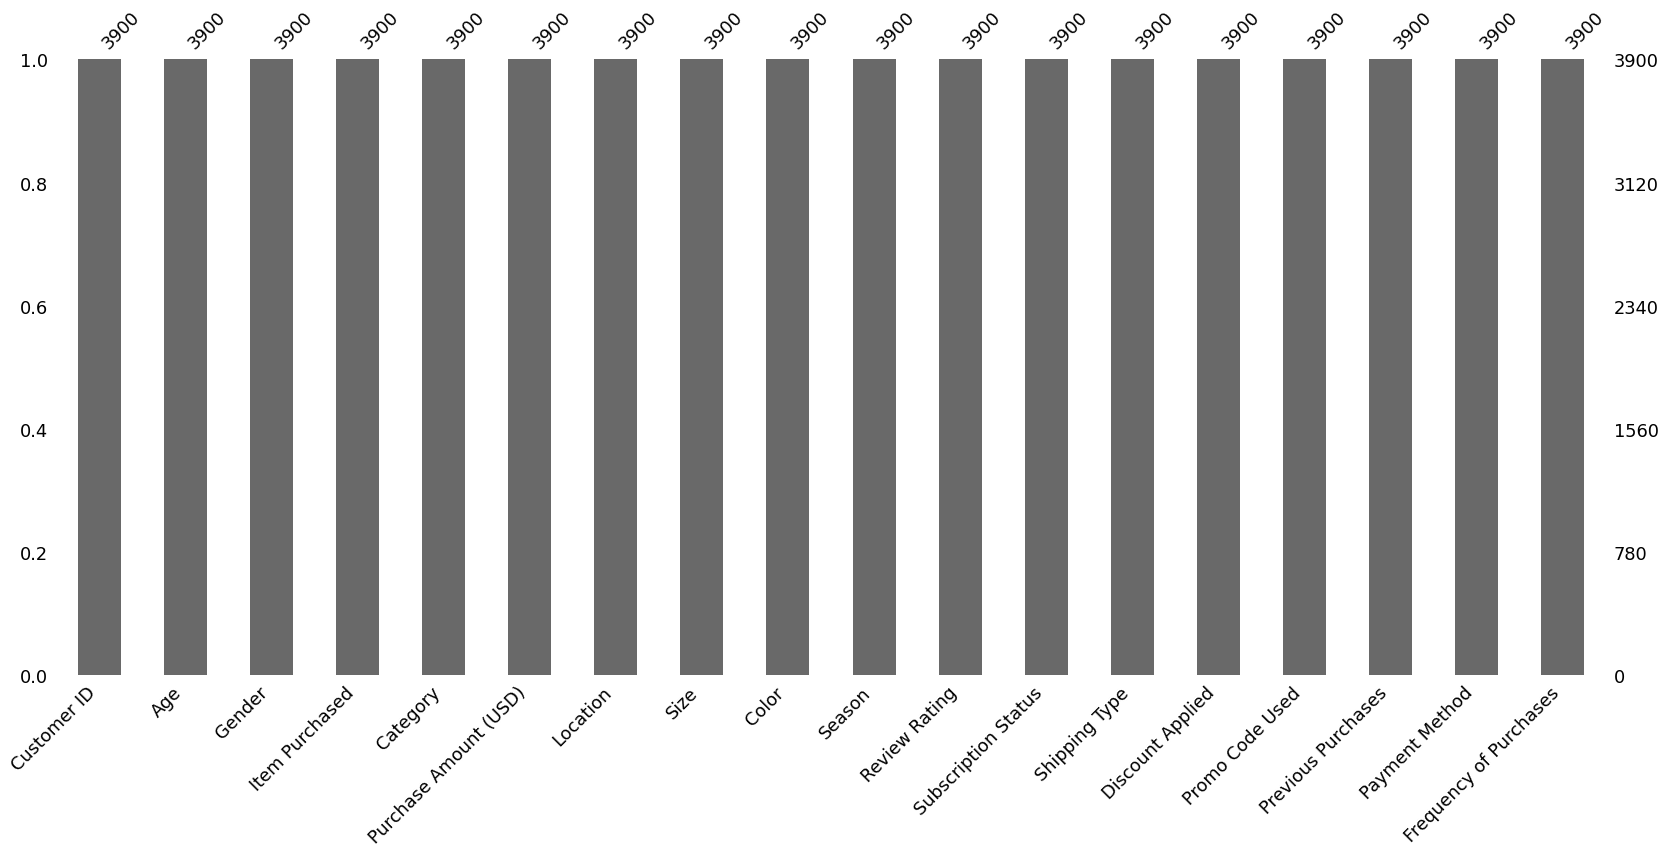

In [388]:
# visualizacion de los posibles nulos
msno.bar(df_processed)
plt.show()

In [390]:
# Compruebo que no hay ningun nulo por medio de una sumatoria
df_processed.isnull().sum().sum()

0

No se obvservo ningun tipo de nulo en las columnas del dataset.

## Ingenieria de caracteristicas

In [391]:
# muestra aleatoria del conjunto de datos, para corroborar el tipo de transformaciones a aplicar
df_processed.sample(4)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
300,301,29,Male,Hat,Accessories,98,Iowa,M,Teal,Spring,4.4,Yes,Store Pickup,Yes,Yes,24,PayPal,Weekly
39,40,70,Male,Pants,Clothing,60,Arizona,S,Turquoise,Summer,4.2,Yes,Express,Yes,Yes,18,Credit Card,Monthly
2357,2358,53,Male,Shirt,Clothing,67,Michigan,L,Cyan,Fall,4.2,No,2-Day Shipping,No,No,40,Credit Card,Bi-Weekly
3682,3683,42,Female,Shirt,Clothing,60,Wyoming,M,Maroon,Fall,4.6,No,Store Pickup,No,No,46,Venmo,Bi-Weekly


In [392]:
df_processed.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

### Seleccion manual de caracteristicas

In [393]:
# elimino la columna 'Discount Applied' ya que es un duplicado de la columna 'Promo code used'
df_processed.drop(columns='Discount Applied', inplace=True)

### Nombres de columnas

In [394]:
# Renombro la columna category para que sea mas representativa
df_processed.rename(columns={'category':'category_item'}, inplace=True)

#### Estandarizacion y re-nombramiento

In [395]:
# lista de signos a eliminar de las columnas
list_signs = ['(', ')']
# lista de las columnas
columns = df_processed.columns

In [396]:
# aplico formato snake_case a cada nombre de las columnas
columns = list(map(snake_case, columns))
# elimino signos de los nombres de las columnas
columns = list(map(lambda col: clean_signs(column_name=col, list_signs=list_signs), columns))

### Valores tipo texto

In [398]:
# paso los valores que no son numericos a minuscula
df_processed[df_processed.select_dtypes(exclude='number').columns] = df_processed[df_processed.select_dtypes(exclude='number').columns].apply(text_to_lower)

Separacion de tipos de columnas

In [399]:
# separo las columnas en dos categorias principales: no numericas y numericas
no_numbers_columns = df_processed.select_dtypes(exclude='number').columns 
number_columns = df_processed.select_dtypes(include='number').columns

Traduccion (aplicara en caso de una futura version)

In [400]:
'''
translator = Translator()

for col in df_processed[no_numbers_columns].columns:
    df_processed[col] = translate_unique_values(df_processed[col])

columns = pd.Series(df_processed.columns)
columns_es = translate_unique_values(columns)
df_processed.columns = columns_es
'''

'\ntranslator = Translator()\n\nfor col in df_processed[no_numbers_columns].columns:\n    df_processed[col] = translate_unique_values(df_processed[col])\n\ncolumns = pd.Series(df_processed.columns)\ncolumns_es = translate_unique_values(columns)\ndf_processed.columns = columns_es\n'

### Tipos de datos

In [401]:
# convierto el tipo de datos
df_processed = df_processed.convert_dtypes(infer_objects=True)

**Datos cualitativos: nominales u ordinales**

In [402]:
# renombro valores redundantes / equivalentes de la columna 'frequency_of_purchases'
df_processed.loc[df_processed['frequency_of_purchases']=='every 3 months', 'frequency_of_purchases'] = 'quarterly'
df_processed.loc[df_processed['frequency_of_purchases']=='fortnightly', 'frequency_of_purchases'] = 'bi-weekly'

In [403]:
# convierto las columnas object a categoricas, ya que en el mayor de los casos, la proporcion de datos unicos por columna no supera el 5% sobre el total e 4000 registros
df_processed[no_numbers_columns] = df_processed[no_numbers_columns].astype('category')

In [404]:
# convierto el tipo de dato de la columna 'customer_id' a object, ya que no se realizaran calculos numericos con ella
df_processed['customer_id'] = df_processed['customer_id'].astype('object')

**Datos cuantitativos**

Rangos o clases

In [405]:
# creo una columna categorica de rango 'vital_stages' derivada de 'age'.
bins = [0, 10, 12, 20, 60, 80, 110]
labels = ["niño", "preadolescente", "adolescente", "adulto", "tercera_edad", "cuarta_edad"]

df_processed['vital_stages'] = pd.cut(df_processed['age'], bins=bins, labels=labels, right=False)

### Codificacion de datos

Variables categoricas ordinales

In [406]:
# defino un diccionario con las categorías en orden

ordinal_variables = {
    'size': ['s', 'm', 'l', 'xl'],
    'subscription_status': ['no', 'yes'],
    'promo_code_used': ['no', 'yes'],
    'frequency_of_purchases': ['weekly', 'bi-weekly', 'monthly', 'quarterly', 'annually'],
    'vital_stages': ['adolescente', 'adulto', 'tercera_edad'],
    'season': ['winter', 'spring', 'summer', 'fall']
}

Variables categoricas nominales

In [407]:
# separo las columnas nominales
nominal_variables = df_processed.select_dtypes(include='category').columns
nominal_variables = [col for col in nominal_variables if col not in ordinal_variables.keys()]

In [408]:
# Inicializo un DataFrame vacío (solo si quieres almacenar los datos codificados por separado)
df_nominal_encoded_variables = pd.DataFrame()

# Inicializo el diccionario labelencoder
label_encoders = {col: LabelEncoder() for col in nominal_variables}

# Aplico el codificador a las columnas nominales y las almaceno en df_nominal_encoded_variables
for col in nominal_variables:
    df_nominal_encoded_variables['nom__' + col] = label_encoders[col].fit_transform(df_processed[col])

In [409]:
# muestro los mapeos de cada variable nominal
equivalences_nominal_features_dict = {}
# obtengo las equivalencias de las columnas nominales
for col in nominal_variables:
    equivalences_nominal_features_dict[f"Equivalencias para la columna {col}:"] = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))

In [410]:
# Instancio el transformador dentro del pipeline
codification_ordinal_variables = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=list(ordinal_variables.values())), list(ordinal_variables.keys()))
    ],
    remainder='passthrough'  # Esto asegura que las columnas que no se transforman se mantengan intactas
)

# Aplico el transformador al DataFrame original
df_ordinal_encoded_variables = pd.DataFrame(
    codification_ordinal_variables.fit_transform(df), 
    columns=codification_ordinal_variables.get_feature_names_out()
)

In [441]:
# accedo al codificador OrdinalEncoder
ordinal_encoder = codification_ordinal_variables.named_transformers_['ord']

# Imprimir las categorías y su codificación
equivalences_ordinal_features_dict = {}
for i, feature in enumerate(ordinal_variables.keys()):
    equivalences_ordinal_features_dict[feature] = {f"Categories: {ordinal_encoder.categories_[i]}": f"Encoded values: {list(range(len(ordinal_encoder.categories_[i])))}"}

### Escalamiento de datos

In [412]:
# Crear el ColumnTransformer con las transformaciones
escalation_numerical_variables = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), number_columns)
    ]
)

In [413]:
# Escalo las variables numéricas
scaled_numerical_variables = escalation_numerical_variables.fit_transform(df_processed[number_columns].copy())
df_scaled_numerical_variables = pd.DataFrame(scaled_numerical_variables, columns=escalation_numerical_variables.get_feature_names_out(input_features=number_columns))

In [415]:
# Concatenar los DataFrames
df_encoded_scaled = pd.concat([df_scaled_numerical_variables, df_ordinal_encoded_variables, df_nominal_encoded_variables], axis=1)

## Resultado final

### DataFrame para machine learning y correlaciones en EDA

### Tabla de mapeo de características codificadas y escaladas

| **Columna transformada**    | **Columna codificada / escalada** | **Codificación / Escalamiento** | **Equivalencia / Rangos**                                                                                                                                                                                                                                                                                                                                                                          |
|-----------------------------|-----------------------------------|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Customer ID**              | -                                 | -                               | -                                                                                                                                                                                                                                                                                                                                                                                             |
| **Age**                      | `num__age`                        | `RobustScaler`                  | `[-1, 1]`                                                                                                                                                                                                                                                                                                                                                                                       |
| **Gender**                   | `nom__gender`                     | `LabelEncoder`                  | `'female': 0, 'male': 1`                                                                                                                                                                                                                                                                                                                                                                        |
| **Item Purchased**           | `nom__item_purchased`             | `LabelEncoder`                  | `'backpack': 0, 'belt': 1, 'blouse': 2, 'boots': 3, 'coat': 4, 'dress': 5, 'gloves': 6, 'handbag': 7, 'hat': 8, 'hoodie': 9, 'jacket': 10, 'jeans': 11, 'jewelry': 12, 'pants': 13, 'sandals': 14, 'scarf': 15, 'shirt': 16, 'shoes': 17, 'shorts': 18, 'skirt': 19, 'sneakers': 20, 'socks': 21, 'sunglasses': 22, 'sweater': 23, 't-shirt': 24`             |
| **Category Item**            | `nom__category_item`              | `LabelEncoder`                  | `'accessories': 0, 'clothing': 1, 'footwear': 2, 'outerwear': 3`                                                                                                                                                                                                                                                                                                                                 |
| **Purchase Amount (USD)**    | `num__purchase_amount_usd`        | `RobustScaler`                  | `[-1, 1]`                                                                                                                                                                                                                                                                                                                                                                                       |
| **Location**                 | `nom__location`                   | `LabelEncoder`                  | `'alabama': 0, 'alaska': 1, 'arizona': 2, 'arkansas': 3, 'california': 4, 'colorado': 5, 'connecticut': 6, 'delaware': 7, 'florida': 8, 'georgia': 9, 'hawaii': 10, 'idaho': 11, 'illinois': 12, 'indiana': 13, 'iowa': 14, 'kansas': 15, 'kentucky': 16, 'louisiana': 17, 'maine': 18, 'maryland': 19, 'massachusetts': 20, 'michigan': 21, 'minnesota': 22, 'mississippi': 23, 'missouri': 24, 'montana': 25, 'nebraska': 26, 'nevada': 27, 'new hampshire': 28, 'new jersey': 29, 'new mexico': 30, 'new york': 31, 'north carolina': 32, 'north dakota': 33, 'ohio': 34, 'oklahoma': 35, 'oregon': 36, 'pennsylvania': 37, 'rhode island': 38, 'south carolina': 39, 'south dakota': 40, 'tennessee': 41, 'texas': 42, 'utah': 43, 'vermont': 44, 'virginia': 45, 'washington': 46, 'west virginia': 47, 'wisconsin': 48, 'wyoming': 49` |
| **Size**                     | `ord__size`                       | `OrdinalEncoder`                | `'s': 0, 'm': 1, 'l': 2, 'xl': 3`                                                                                                                                                                                                                                                                                                                                                               |
| **Color**                    | `nom__color`                      | `LabelEncoder`                  | `'beige': 0, 'black': 1, 'blue': 2, 'brown': 3, 'charcoal': 4, 'cyan': 5, 'gold': 6, 'gray': 7, 'green': 8, 'indigo': 9, 'lavender': 10, 'magenta': 11, 'maroon': 12, 'olive': 13, 'orange': 14, 'peach': 15, 'pink': 16, 'purple': 17, 'red': 18, 'silver': 19, 'teal': 20, 'turquoise': 21, 'violet': 22, 'white': 23, 'yellow': 24`                                         |
| **Season**                   | `ord__season`                     | `OrdinalEncoder`                | `'winter': 0, 'spring': 1, 'summer': 2, 'fall': 3`                                                                                                                                                                                                                                                                                                                                             |
| **Review Rating**            | `num__review_rating`              | `RobustScaler`                  | -                                                                                                                                                                                                                                                                                                                                                                                             |
| **Subscription Status**      | `ord__subscription_status`        | `OrdinalEncoder`                | `'no': 0, 'yes': 1`                                                                                                                                                                                                                                                                                                                                                                            |
| **Shipping Type**            | `nom__shipping_type`              | `LabelEncoder`                  | `'2-day shipping': 0, 'express': 1, 'free shipping': 2, 'next day air': 3, 'standard': 4, 'store pickup': 5`                                                                                                                                                                                                                                                                                   |
| **Promo Code Used**          | `ord__promo_code_used`            | `OrdinalEncoder`                | `'no': 0, 'yes': 1`                                                                                                                                                                                                                                                                                                                                                                            |
| **Previous Purchases**       | `ord__previous_purchases`         | `OrdinalEncoder`                | -                                                                                                                                                                                                                                                                                                                                                                                             |
| **Payment Method**           | `nom__payment_method`             | `LabelEncoder`                  | `'bank transfer': 0, 'cash': 1, 'credit card': 2, 'debit card': 3, 'paypal': 4, 'venmo': 5`                                                                                                                                                                                                                                                                                                   |
| **Frequency of Purchases**   | `ord__frequency_of_purchases`     | `OrdinalEncoder`                | `'weekly': 0, 'bi-weekly': 1, 'monthly': 2, 'quarterly': 3, 'annually': 4`                                                                                                                                                                                                                                                                                                                     |
| **Vital Stages**             | `ord__vital_stages`               | `OrdinalEncoder`                | `'adolescente': 0, 'adulto': 1, 'tercera_edad': 2`                                                                                                                                                                                                                                                                                                                                             |

In [416]:
df_encoded_scaled.sample(4, random_state=3)

,num__customer_id,num__age,num__purchase_amount_usd,num__review_rating,num__previous_purchases,ord__size,ord__subscription_status,ord__promo_code_used,ord__frequency_of_purchases,ord__vital_stages,ord__season,nom__gender,nom__item_purchased,nom__category,nom__location,nom__color,nom__shipping_type,nom__payment_method
2990,0.533727,0.961538,0.738095,0.384615,-0.04,1.0,0.0,0.0,2.0,2.0,3.0,0,16,1,12,20,2,5
1314,-0.325981,-0.076923,0.166667,-0.230769,0.96,0.0,0.0,1.0,4.0,1.0,2.0,1,3,2,24,11,2,3
3265,0.674788,-0.153846,0.952381,-0.384615,0.12,1.0,0.0,0.0,1.0,1.0,0.0,0,22,0,0,23,1,2
3399,0.743524,-0.153846,-0.119048,-0.307692,0.44,3.0,0.0,0.0,4.0,1.0,0.0,0,13,1,25,24,4,3


In [417]:
path_encoded_scaled_dataset = '../data/2_silver/df_encoded_scaled.csv'
df_encoded_scaled.to_csv(path_encoded_scaled_dataset, index=False)

### DataFrame para bi

### Tabla de mapeo de características transformadas (sin codificacion ni escalamiento)

| **Columna Original**           | **Columna Transformada**     | **Tipo de Dato Transformado** | **Variables Transformadas** |
|-------------------------------|------------------------------|-------------------------------|------------------------------|
| **Customer ID**               | `customer_id`                | `object`                      |                              |
| **Age**                       | `age`                        | `int64`                       |                              |
| **Gender**                    | `gender`                     | `category`                    | 'male', 'female'             |
| **Item Purchased**            | `item_purchased`             | `category`                    | 'blouse', 'sweater', 'jeans', 'sandals', 'sneakers', ..., 'socks', 'backpack', 'belt', 'boots', 'gloves' |
| **Category**                  | `category_item`              | `category`                    | 'clothing', 'footwear', 'outerwear', 'accessories' |
| **Purchase Amount (USD)**     | `purchase_amount_usd`        | `int64`                       |                              |
| **Location**                  | `location`                   | `category`                    | 'kentucky', 'maine', 'massachusetts', 'rhode island', 'oregon', ..., 'south dakota', 'minnesota', 'washington', 'wisconsin', 'michigan' |
| **Size**                      | `size`                       | `category`                    | 'l', 's', 'm', 'xl'          |
| **Color**                     | `color`                      | `category`                    | 'gray', 'maroon', 'turquoise', 'white', 'charcoal', ..., 'orange', 'indigo', 'yellow', 'magenta', 'blue' |
| **Season**                    | `season`                     | `category`                    | 'winter', 'spring', 'summer', 'fall' |
| **Review Rating**             | `review_rating`              | `float64`                     |                              |
| **Subscription Status**       | `subscription_status`        | `category`                    | 'yes', 'no'                  |
| **Shipping Type**             | `shipping_type`              | `category`                    | 'express', 'free shipping', 'next day air', 'standard', '2-day shipping', 'store pickup' |
| **Promo Code Used**           | `promo_code_used`            | `category`                    | 'yes', 'no'                  |
| **Previous Purchases**        | `previous_purchases`         | `int64`                       |                              |
| **Payment Method**            | `payment_method`             | `category`                    | 'venmo', 'cash', 'credit card', 'paypal', 'bank transfer', 'debit card' |
| **Frequency of Purchases**    | `frequency_of_purchases`     | `category`                    | 'bi-weekly', 'weekly', 'annually', 'quarterly', 'monthly' |
| -                             | `vital_stages`               | `category`                    | 'adulto', 'adolescente', 'tercera_edad' |

In [418]:
df_processed.sample(4, random_state=3)

,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,vital_stages
2990,2991,69,female,shirt,clothing,91,illinois,m,teal,fall,4.2,no,free shipping,no,24,venmo,monthly,tercera_edad
1314,1315,42,male,boots,footwear,67,missouri,s,magenta,summer,3.4,no,free shipping,yes,49,debit card,annually,adulto
3265,3266,40,female,sunglasses,accessories,100,alabama,m,white,winter,3.2,no,express,no,28,credit card,bi-weekly,adulto
3399,3400,40,female,pants,clothing,55,montana,xl,yellow,winter,3.3,no,standard,no,36,debit card,annually,adulto


In [419]:
# guardo los dataframes procesados y escalados en la carpeta "silver"
path_processed_dataset = '../data/3_gold/df_processed.csv'
df_processed.to_csv(path_processed_dataset, index=False)